<a href="https://colab.research.google.com/github/sac-1999/Advance-House-Prediction/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
house = pd.read_csv('train.csv')

In [ ]:
house.describe()

In [33]:
cat_columns = list(pd.DataFrame(house.dtypes)[pd.DataFrame(house.dtypes)[0] == 'object'].index)
num_columns = list(pd.DataFrame(house.dtypes)[pd.DataFrame(house.dtypes)[0] != 'object'].index)

Data Analysis

1. Null Values Analysis

In [48]:
null_values = pd.DataFrame(house.isnull().sum()/len(house))


In [56]:
drop_columns = list(null_values[null_values[0]>0.6].index)
house.drop(labels = drop_columns, axis = 1, inplace=True)
## All dropped columns are categorical columns

In [ ]:
null_values = pd.DataFrame(house.isnull().sum()/len(house))


## finding which are categorica columns
missing_columns = list(null_values[null_values[0]>0].index)
missing_columns
missing_cat_columns = []
missing_num_columns = []
for coln in missing_columns:
  if(coln in cat_columns):
    missing_cat_columns.append(coln)

  else:
    missing_num_columns.append(coln)

missing_cat_columns, missing_num_columns



Various Ways to Handle Missing Values of Categorical values
1. replace by mode

In [95]:
from statistics import mode
def replace_by_mode(columns):
  for coln in columns:
    house[coln] = np.where(house[coln].isnull(),house[coln].mode(),house[coln])
  

2. Treat Null as a individual category

Hnadling numerical missing values by median

In [96]:
replace_by_mode(missing_cat_columns)

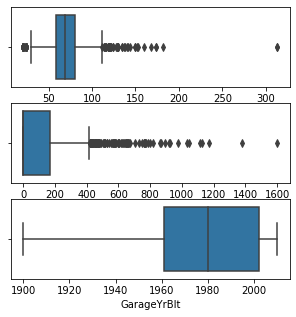

In [116]:
fig = plt.figure(figsize =(5,5))
for i,coln in enumerate(missing_num_columns):
  plt.subplot(3,1,i+1)
  sns.boxplot(data = house, x = coln)

In [ ]:
## there are many Outliers in above plot hence we will use median to fill null values



In [117]:
from numpy import median,mean
from statistics import mode
def replace_by_median(columns):
  for coln in columns:
    house[coln] = np.where(house[coln].isnull(),house[coln].median(),house[coln])

replace_by_median(missing_num_columns)

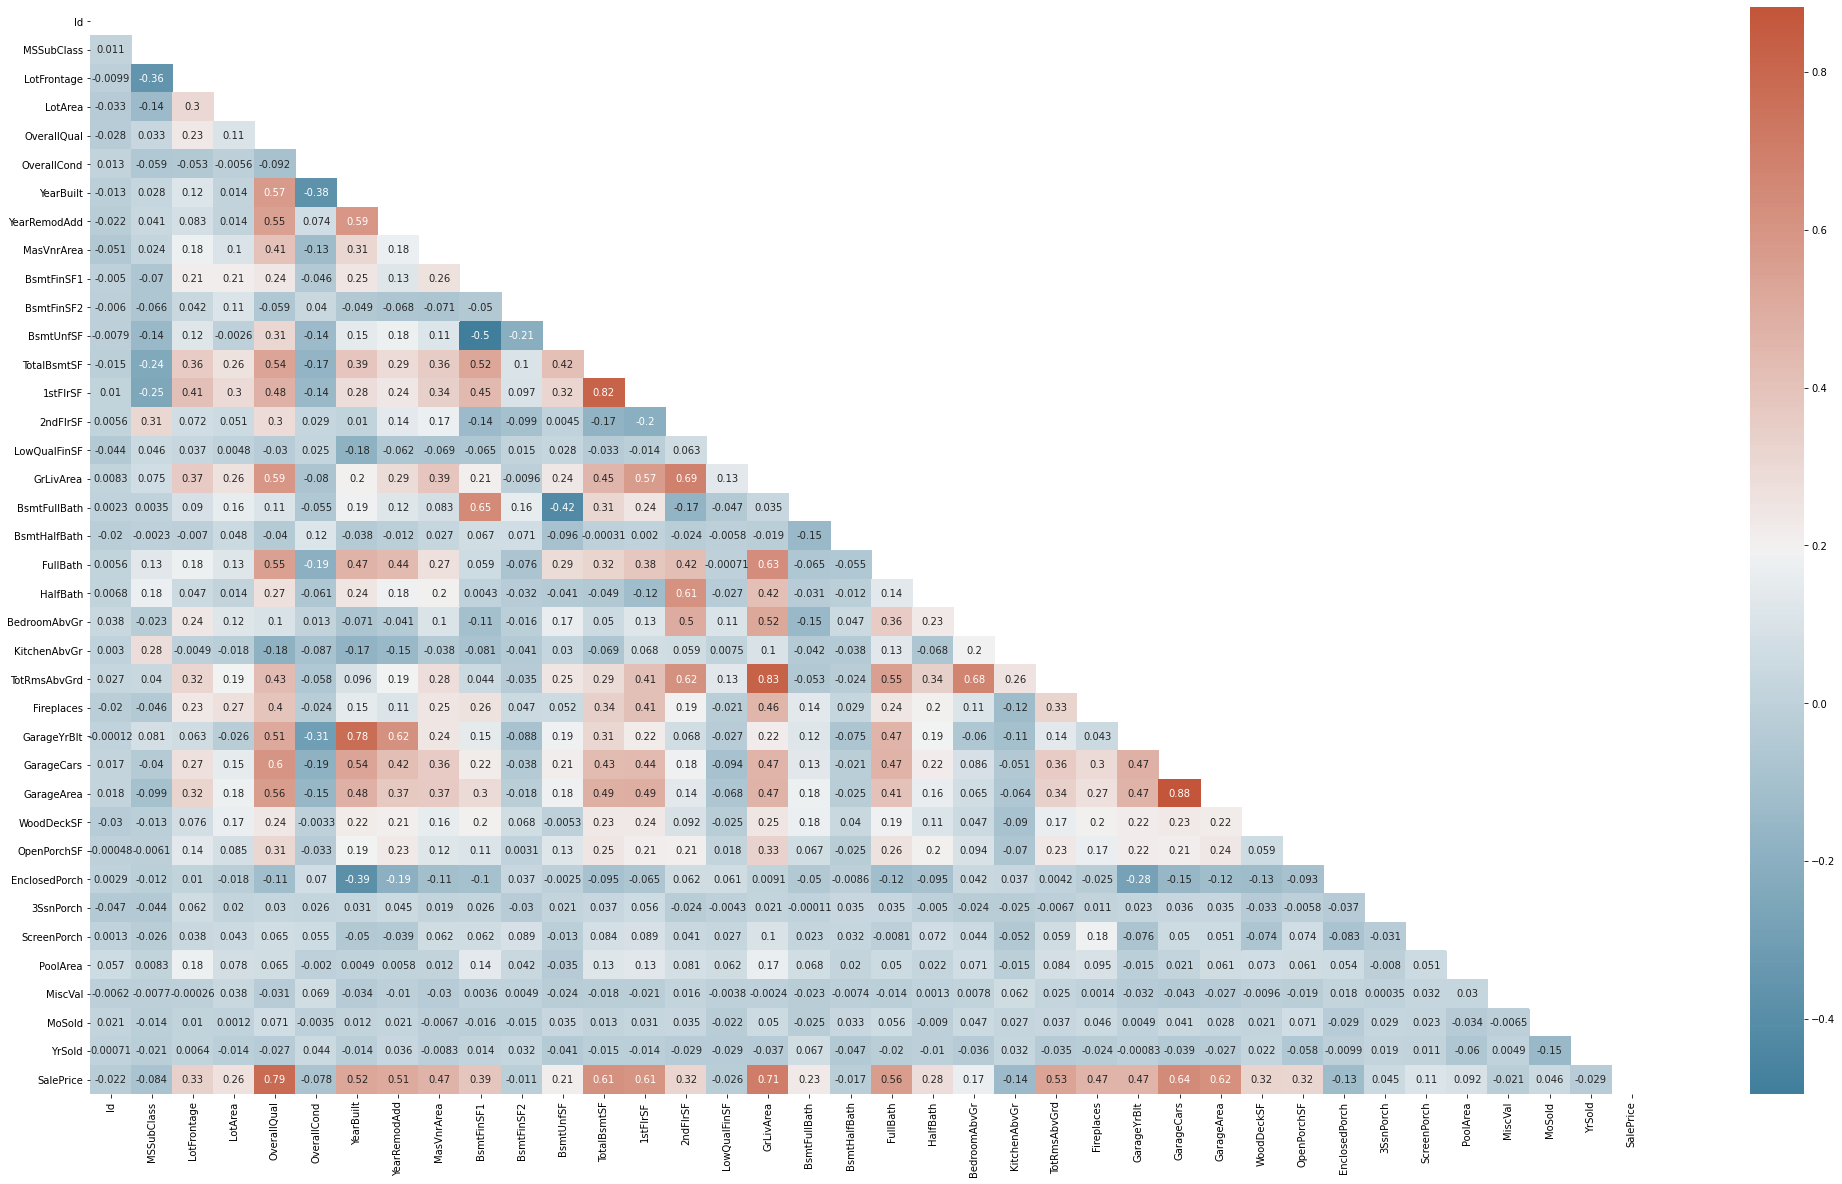

In [125]:
cormat = house.corr() 
mask = np.triu(np.ones_like(cormat, dtype=bool)) 
plt.figure(figsize=(35,20)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(cormat, annot = True,mask =mask ,cmap = cmap )

In [ ]:
house